# Code for plots

In [4]:
import pandas as pd
df = pd.read_csv('GoMore_Data_DK_variables.csv', sep=',', low_memory=False)

In [13]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns 

%matplotlib inline

In [14]:
import geopandas as gp #you have to install panda first with the command "conda install geopanda"
from shapely.geometry import Point

# Geopanda for departure

In [5]:
#geopandas

#make sample
#sample = df.sample(frac=0.01)
#len(sample)
sample_dep = df #her bruger vi hele datasættet

In [6]:
sample_dep['Coordinates'] = list(zip(sample_dep.longitude_dep, sample_dep.latitude_dep))
sample_dep['Coordinates'] = sample_dep['Coordinates'].apply(Point)
gdp = gp.GeoDataFrame(sample_dep, geometry='Coordinates')
gdp.head()

,id,depart_date_time,seats,free_seats,user_id,handle_fee_rate,handle_fee_ceiling_factor,handle_fee_maximum,accept_cash,accept_online_payment,...,date_weekday,Denmark,SJ_dep,SJ_arr,betalingsvej,betalingsvej_dummy,pris_kr,distance_km,pris_per_km,Coordinates
0,7385002,2018-08-07T15:30:00+02:00,2,0,269889,12.5,100,NaN,False,True,...,1,True,True,False,1,1,185.0,271.775,0.680710,POINT (12.465726 55.673514)
1,7385006,2018-08-07T14:00:00+02:00,3,3,1399528,12.5,100,NaN,False,True,...,1,True,False,True,1,1,180.0,343.083,0.524654,POINT (10.036539 56.460584)
2,7385007,2018-08-09T08:30:00+02:00,1,0,1438456,12.5,100,NaN,False,True,...,3,True,True,False,1,1,150.0,268.189,0.559307,POINT (12.5381179 55.657333)
3,7385010,2018-08-07T06:45:00+02:00,3,3,906186,12.5,100,NaN,False,True,...,1,True,False,False,0,0,35.0,73.159,0.478410,POINT (8.589933 56.48493000000001)
4,7385011,2018-08-10T16:15:00+02:00,2,1,2318925,12.5,100,NaN,False,True,...,4,True,False,False,0,0,55.0,74.306,0.740182,POINT (10.1848928 56.188259)


In [7]:
shp = gp.GeoDataFrame.from_file('/Users/victoriamariastokholmhundevad/Downloads/DNK_adm/DNK_adm2.shp') #denne virker kun hos Emma - læg op
shp.plot()

In [8]:
shp.crs = {'init': 'epsg:4326'} #kod til samme form for koordinater
gdp.crs = {'init': 'epsg:4326'}

dk_rides_dep = gp.tools.sjoin(gdp, shp, how="right", op='intersects')

In [9]:
#Getting number of banks per district - NB. vi bruger selvfølgelig antal rides i Danmark :)
num_rides_per_district_dep = dk_rides_dep.groupby("NAME_2").size()
num_rides_per_district_dep = num_rides_per_district_dep.to_frame(name="dep_num").reset_index()

#Establishing cut categories
#num_rides_per_district_dep["quant_cuts"] = pd.cut(num_rides_per_district_dep["dep_num"], bins=[0, 10, 20, 30, 40, 100], 
              #labels=["<=10", "<=20", "<=30","<=40", ">40"])
#dep_ride_num = pd.merge(shp, num_rides_per_district_dep, on="NAME_2", how="right")

In [11]:
dep_df_num = pd.merge(shp, num_rides_per_district_dep, on="NAME_2", how="right")

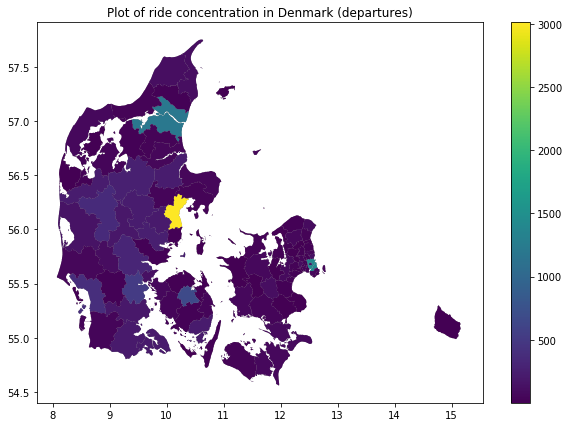

In [16]:
fig, ax = plt.subplots(1, figsize=(10,7))
base = shp.plot(ax=ax, color='gray')
#gdf.plot(ax=base, marker="o", markersize=5, alpha=0.5)
dep_df_num.plot(ax=base, column='dep_num', alpha=1, legend=True)
ax.set_title("Plot of ride concentration in Denmark (departures)")
leg = ax.get_legend()

# Geopandas for arrival

In [17]:
sample_arr = df #her bruger vi hele datasættet

In [20]:
sample_arr['Coordinates'] = list(zip(sample_arr.longitude_arr, sample_arr.latitude_arr))
sample_arr['Coordinates'] = sample_arr['Coordinates'].apply(Point)
garr = gp.GeoDataFrame(sample_arr, geometry='Coordinates')
garr.head()

,id,depart_date_time,seats,free_seats,user_id,handle_fee_rate,handle_fee_ceiling_factor,handle_fee_maximum,accept_cash,accept_online_payment,...,date_weekday,Denmark,SJ_dep,SJ_arr,betalingsvej,betalingsvej_dummy,pris_kr,distance_km,pris_per_km,Coordinates
index_left,,,,,,,,,,,,,,,,,,,,,
0,7385002,2018-08-07T15:30:00+02:00,2,0,269889,12.5,100,NaN,False,True,...,1,True,True,False,1,1,185.0,271.775,0.680710,POINT (9.8968571 56.0251671)
1,7385006,2018-08-07T14:00:00+02:00,3,3,1399528,12.5,100,NaN,False,True,...,1,True,False,True,1,1,180.0,343.083,0.524654,POINT (12.5683372 55.6760968)
2,7385007,2018-08-09T08:30:00+02:00,1,0,1438456,12.5,100,NaN,False,True,...,3,True,True,False,1,1,150.0,268.189,0.559307,POINT (9.237394 55.844405)
3,7385010,2018-08-07T06:45:00+02:00,3,3,906186,12.5,100,NaN,False,True,...,1,True,False,False,0,0,35.0,73.159,0.478410,POINT (8.7034921 56.95916800000001)
4,7385011,2018-08-10T16:15:00+02:00,2,1,2318925,12.5,100,NaN,False,True,...,4,True,False,False,0,0,55.0,74.306,0.740182,POINT (9.5282372 55.7134411)


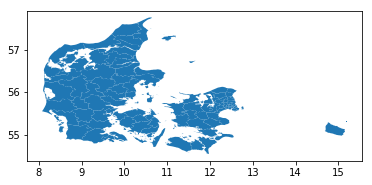

In [21]:
shp = gp.GeoDataFrame.from_file('/Users/victoriamariastokholmhundevad/Downloads/DNK_adm/DNK_adm2.shp') #denne virker kun hos Emma - læg op
shp.plot()

In [22]:
shp.crs = {'init': 'epsg:4326'} #kod til samme form for koordinater
garr.crs = {'init': 'epsg:4326'}

dk_rides_arr = gp.tools.sjoin(garr, shp, how="right", op='intersects')
dk_rides_arr

,index_left,id,depart_date_time,seats,free_seats,user_id,handle_fee_rate,handle_fee_ceiling_factor,handle_fee_maximum,accept_cash,...,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
index_right,,,,,,,,,,,,,,,,,,,,,
44,0.0,7385002.0,2018-08-07T15:30:00+02:00,2.0,0.0,269889.0,12.5,100.0,NaN,False,...,Denmark,2,Midtjylland,45,Skanderborg,Kommune,Municipality,None,None,(POLYGON ((10.01367568969732 55.98131561279308...
44,5.0,7385035.0,2018-08-06T20:30:00+02:00,3.0,3.0,734681.0,12.5,100.0,NaN,False,...,Denmark,2,Midtjylland,45,Skanderborg,Kommune,Municipality,None,None,(POLYGON ((10.01367568969732 55.98131561279308...
44,149.0,7385709.0,2018-08-07T12:40:00+02:00,5.0,0.0,57855.0,12.5,100.0,NaN,False,...,Denmark,2,Midtjylland,45,Skanderborg,Kommune,Municipality,None,None,(POLYGON ((10.01367568969732 55.98131561279308...
44,211.0,7386006.0,2018-08-07T07:30:00+02:00,3.0,3.0,541988.0,12.5,100.0,NaN,False,...,Denmark,2,Midtjylland,45,Skanderborg,Kommune,Municipality,None,None,(POLYGON ((10.01367568969732 55.98131561279308...
44,242.0,7386127.0,2018-08-07T10:20:00+02:00,2.0,2.0,267139.0,12.5,100.0,NaN,False,...,Denmark,2,Midtjylland,45,Skanderborg,Kommune,Municipality,None,None,(POLYGON ((10.01367568969732 55.98131561279308...
44,243.0,7386133.0,2018-08-07T16:00:00+02:00,2.0,2.0,814817.0,12.5,100.0,NaN,False,...,Denmark,2,Midtjylland,45,Skanderborg,Kommune,Municipality,None,None,(POLYGON ((10.01367568969732 55.98131561279308...
44,247.0,7386147.0,2018-08-07T13:30:00+02:00,2.0,2.0,56642.0,12.5,100.0,NaN,False,...,Denmark,2,Midtjylland,45,Skanderborg,Kommune,Municipality,None,None,(POLYGON ((10.01367568969732 55.98131561279308...
44,255.0,7386173.0,2018-08-08T10:25:00+02:00,2.0,2.0,267139.0,12.5,100.0,NaN,False,...,Denmark,2,Midtjylland,45,Skanderborg,Kommune,Municipality,None,None,(POLYGON ((10.01367568969732 55.98131561279308...
44,261.0,7386185.0,2018-08-09T10:25:00+02:00,2.0,2.0,267139.0,12.5,100.0,NaN,False,...,Denmark,2,Midtjylland,45,Skanderborg,Kommune,Municipality,None,None,(POLYGON ((10.01367568969732 55.98131561279308...


In [23]:
#Getting number of rides per district
num_rides_per_district_arr = dk_rides_arr.groupby("NAME_2").size()
num_rides_per_district_arr = num_rides_per_district_arr.to_frame(name="arr_num").reset_index()
num_rides_per_district_arr.head()


,NAME_2,arr_num
0,Aabenraa,164
1,Aalborg,1168
2,Albertslund,106
3,Allerød,10
4,Assens,41


In [24]:
#Establishing cut categories
arr_ride_num = pd.merge(shp, num_rides_per_district_arr, on="NAME_2", how="right")

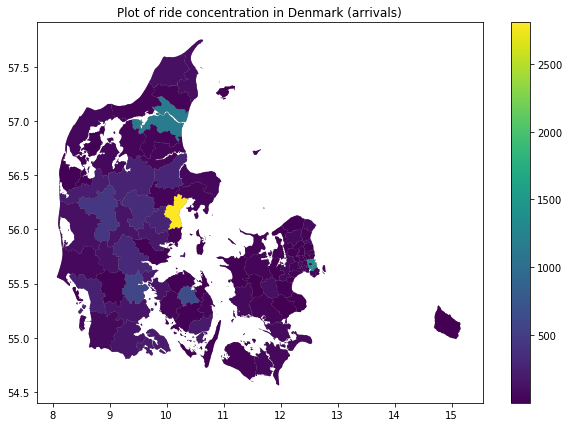

In [26]:
fig, ax = plt.subplots(1, figsize=(10,7))
base = shp.plot(ax=ax, color='gray')
#gdf.plot(ax=base, marker="o", markersize=5, alpha=0.5)
arr_ride_num.plot(ax=base, column='arr_num', alpha=1, legend=True)
ax.set_title("Plot of ride concentration in Denmark (arrivals)")
leg = ax.get_legend()

In [27]:
#Creating the new dataframe with population data and renaming the values, that do not match our geomap
pop_mun = pd.read_excel('/Users/victoriamariastokholmhundevad/Desktop/Egen kopi 1/201882810298227085411BY2.xlsx', index_col=None)
pop_mun.to_csv('pop_mun.csv', encoding='utf-8')
pop_mun = pd.read_csv('pop_mun.csv')
pop_mun = pop_mun.dropna().reset_index(drop=True)
pop_mun = pop_mun.drop('Unnamed: 0', 1)
pop_mun.columns = ['NAME_2', 'Pop']
pop_mun.at[79, 'NAME_2'] = 'Århus'
pop_mun.at[97, 'NAME_2'] = 'Vesthimmerland'
pop_mun.at[12, 'NAME_2'] = 'Høje Taastrup'
print(pop_mun.head())

          NAME_2       Pop
0      København  613288.0
1  Frederiksberg  104410.0
2         Dragør   14272.0
3         Tårnby   43063.0
4    Albertslund   27743.0


In [28]:
sample_pcd = df

In [30]:
sample_pcd['Coordinates'] = list(zip(sample_pcd.longitude_dep, sample_pcd.latitude_dep))
sample_pcd['Coordinates'] = sample_pcd['Coordinates'].apply(Point)
gdp_pcd = gp.GeoDataFrame(sample_pcd, geometry='Coordinates')
gdp_pcd.head()

,id,depart_date_time,seats,free_seats,user_id,handle_fee_rate,handle_fee_ceiling_factor,handle_fee_maximum,accept_cash,accept_online_payment,...,date_weekday,Denmark,SJ_dep,SJ_arr,betalingsvej,betalingsvej_dummy,pris_kr,distance_km,pris_per_km,Coordinates
index_left,,,,,,,,,,,,,,,,,,,,,
0,7385002,2018-08-07T15:30:00+02:00,2,0,269889,12.5,100,NaN,False,True,...,1,True,True,False,1,1,185.0,271.775,0.680710,POINT (12.465726 55.673514)
1,7385006,2018-08-07T14:00:00+02:00,3,3,1399528,12.5,100,NaN,False,True,...,1,True,False,True,1,1,180.0,343.083,0.524654,POINT (10.036539 56.460584)
2,7385007,2018-08-09T08:30:00+02:00,1,0,1438456,12.5,100,NaN,False,True,...,3,True,True,False,1,1,150.0,268.189,0.559307,POINT (12.5381179 55.657333)
3,7385010,2018-08-07T06:45:00+02:00,3,3,906186,12.5,100,NaN,False,True,...,1,True,False,False,0,0,35.0,73.159,0.478410,POINT (8.589933 56.48493000000001)
4,7385011,2018-08-10T16:15:00+02:00,2,1,2318925,12.5,100,NaN,False,True,...,4,True,False,False,0,0,55.0,74.306,0.740182,POINT (10.1848928 56.188259)


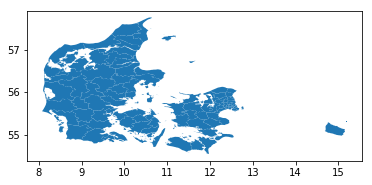

In [31]:
shp = gp.GeoDataFrame.from_file('/Users/victoriamariastokholmhundevad/Downloads/DNK_adm/DNK_adm2.shp') #denne virker kun hos Emma - læg op
shp.plot()

In [32]:
shp.crs = {'init': 'epsg:4326'} #kod til samme form for koordinater
gdp_pcd.crs = {'init': 'epsg:4326'}

dk_rides = gp.tools.sjoin(gdp_pcd, shp, how="right", op='intersects')

In [33]:
#Getting number of banks per district - NB. vi bruger selvfølgelig antal rides i Danmark :)
num_rides_per_district_dep_pcd = dk_rides.groupby("NAME_2").size()
num_rides_per_district_dep_pcd = num_rides_per_district_dep_pcd.to_frame(name="dep_num").reset_index()

#Establishing cut categories
#num_rides_per_district_dep["quant_cuts"] = pd.cut(num_rides_per_district_dep["dep_num"], bins=[0, 10, 20, 30, 40, 100], 
              #labels=["<=10", "<=20", "<=30","<=40", ">40"])
#dep_ride_num = pd.merge(shp, num_rides_per_district_dep, on="NAME_2", how="right")

In [34]:
#Merging the dataset of geo with numbers
new_df_dep_pcd = pd.merge(pop_mun, num_rides_per_district_dep_pcd, how='left', on=['NAME_2'])
new_df_dep_pcd.head()

,NAME_2,Pop,dep_num
0,København,613288.0,1407
1,Frederiksberg,104410.0,148
2,Dragør,14272.0,2
3,Tårnby,43063.0,53
4,Albertslund,27743.0,102


In [35]:
new_df_dep_pcd['per_capita'] = new_df_dep_pcd['dep_num']*1/new_df_dep_pcd['Pop']*1
#print(new_df_dep.head)
dep_df_num_pcd = pd.merge(shp, new_df_dep_pcd, on="NAME_2", how="right")

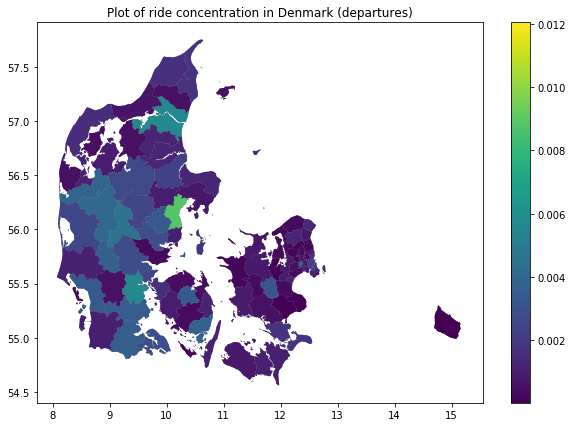

In [36]:
fig, ax = plt.subplots(1, figsize=(10,7))
base = shp.plot(ax=ax, color='gray')
#gdf.plot(ax=base, marker="o", markersize=5, alpha=0.5)
dep_df_num_pcd.plot(ax=base, column='per_capita', alpha=1, legend=True)
ax.set_title("Plot of ride concentration in Denmark (departures)")
leg = ax.get_legend()

In [37]:
sample_PCA = df #her bruger vi hele datasættet

In [38]:
sample_PCA['Coordinates'] = list(zip(sample_PCA.longitude_arr, sample_PCA.latitude_arr))
sample_PCA['Coordinates'] = sample_PCA['Coordinates'].apply(Point)
garr = gp.GeoDataFrame(sample_PCA, geometry='Coordinates')
garr.head()

,id,depart_date_time,seats,free_seats,user_id,handle_fee_rate,handle_fee_ceiling_factor,handle_fee_maximum,accept_cash,accept_online_payment,...,date_weekday,Denmark,SJ_dep,SJ_arr,betalingsvej,betalingsvej_dummy,pris_kr,distance_km,pris_per_km,Coordinates
index_left,,,,,,,,,,,,,,,,,,,,,
0,7385002,2018-08-07T15:30:00+02:00,2,0,269889,12.5,100,NaN,False,True,...,1,True,True,False,1,1,185.0,271.775,0.680710,POINT (9.8968571 56.0251671)
1,7385006,2018-08-07T14:00:00+02:00,3,3,1399528,12.5,100,NaN,False,True,...,1,True,False,True,1,1,180.0,343.083,0.524654,POINT (12.5683372 55.6760968)
2,7385007,2018-08-09T08:30:00+02:00,1,0,1438456,12.5,100,NaN,False,True,...,3,True,True,False,1,1,150.0,268.189,0.559307,POINT (9.237394 55.844405)
3,7385010,2018-08-07T06:45:00+02:00,3,3,906186,12.5,100,NaN,False,True,...,1,True,False,False,0,0,35.0,73.159,0.478410,POINT (8.7034921 56.95916800000001)
4,7385011,2018-08-10T16:15:00+02:00,2,1,2318925,12.5,100,NaN,False,True,...,4,True,False,False,0,0,55.0,74.306,0.740182,POINT (9.5282372 55.7134411)


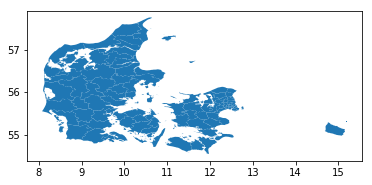

In [39]:
shp = gp.GeoDataFrame.from_file('/Users/victoriamariastokholmhundevad/Downloads/DNK_adm/DNK_adm2.shp') #denne virker kun hos Emma - læg op
shp.plot()

In [40]:
shp.crs = {'init': 'epsg:4326'} #kod til samme form for koordinater
garr.crs = {'init': 'epsg:4326'}

dk_rides__PCA = gp.tools.sjoin(garr, shp, how="right", op='intersects')
dk_rides__PCA

,index_left,id,depart_date_time,seats,free_seats,user_id,handle_fee_rate,handle_fee_ceiling_factor,handle_fee_maximum,accept_cash,...,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
index_right,,,,,,,,,,,,,,,,,,,,,
44,0.0,7385002.0,2018-08-07T15:30:00+02:00,2.0,0.0,269889.0,12.5,100.0,NaN,False,...,Denmark,2,Midtjylland,45,Skanderborg,Kommune,Municipality,None,None,(POLYGON ((10.01367568969732 55.98131561279308...
44,5.0,7385035.0,2018-08-06T20:30:00+02:00,3.0,3.0,734681.0,12.5,100.0,NaN,False,...,Denmark,2,Midtjylland,45,Skanderborg,Kommune,Municipality,None,None,(POLYGON ((10.01367568969732 55.98131561279308...
44,149.0,7385709.0,2018-08-07T12:40:00+02:00,5.0,0.0,57855.0,12.5,100.0,NaN,False,...,Denmark,2,Midtjylland,45,Skanderborg,Kommune,Municipality,None,None,(POLYGON ((10.01367568969732 55.98131561279308...
44,211.0,7386006.0,2018-08-07T07:30:00+02:00,3.0,3.0,541988.0,12.5,100.0,NaN,False,...,Denmark,2,Midtjylland,45,Skanderborg,Kommune,Municipality,None,None,(POLYGON ((10.01367568969732 55.98131561279308...
44,242.0,7386127.0,2018-08-07T10:20:00+02:00,2.0,2.0,267139.0,12.5,100.0,NaN,False,...,Denmark,2,Midtjylland,45,Skanderborg,Kommune,Municipality,None,None,(POLYGON ((10.01367568969732 55.98131561279308...
44,243.0,7386133.0,2018-08-07T16:00:00+02:00,2.0,2.0,814817.0,12.5,100.0,NaN,False,...,Denmark,2,Midtjylland,45,Skanderborg,Kommune,Municipality,None,None,(POLYGON ((10.01367568969732 55.98131561279308...
44,247.0,7386147.0,2018-08-07T13:30:00+02:00,2.0,2.0,56642.0,12.5,100.0,NaN,False,...,Denmark,2,Midtjylland,45,Skanderborg,Kommune,Municipality,None,None,(POLYGON ((10.01367568969732 55.98131561279308...
44,255.0,7386173.0,2018-08-08T10:25:00+02:00,2.0,2.0,267139.0,12.5,100.0,NaN,False,...,Denmark,2,Midtjylland,45,Skanderborg,Kommune,Municipality,None,None,(POLYGON ((10.01367568969732 55.98131561279308...
44,261.0,7386185.0,2018-08-09T10:25:00+02:00,2.0,2.0,267139.0,12.5,100.0,NaN,False,...,Denmark,2,Midtjylland,45,Skanderborg,Kommune,Municipality,None,None,(POLYGON ((10.01367568969732 55.98131561279308...


In [41]:
#Getting number of rides per district
num_rides_per_district_PCA = dk_rides__PCA.groupby("NAME_2").size()
num_rides_per_district_PCA = num_rides_per_district_PCA.to_frame(name="arr_num").reset_index()
num_rides_per_district_PCA.head()


,NAME_2,arr_num
0,Aabenraa,164
1,Aalborg,1168
2,Albertslund,106
3,Allerød,10
4,Assens,41


In [42]:
#Merging the dataset of geo with numbers
new_df_PCA = pd.merge(pop_mun, num_rides_per_district_PCA, how='left', on=['NAME_2'])

In [43]:
new_df_PCA['per_capita'] = new_df_PCA['arr_num']*1/new_df_PCA['Pop']*1
new_df_PCA.head()

,NAME_2,Pop,arr_num,per_capita
0,København,613288.0,1402,0.002286
1,Frederiksberg,104410.0,110,0.001054
2,Dragør,14272.0,3,0.000210
3,Tårnby,43063.0,64,0.001486
4,Albertslund,27743.0,106,0.003821


In [45]:
#Establishing cut categories
#new_df["quant_cuts"] = pd.cut(new_df["per_capita"], bins=[0, 0.00001, 0.0001, 0.001, 0.01], 
              #labels=["<=10", "<=20", "<=30","<=40", ">40"])
arr_ride_num_PCA = pd.merge(shp, new_df_PCA, on="NAME_2", how="right")

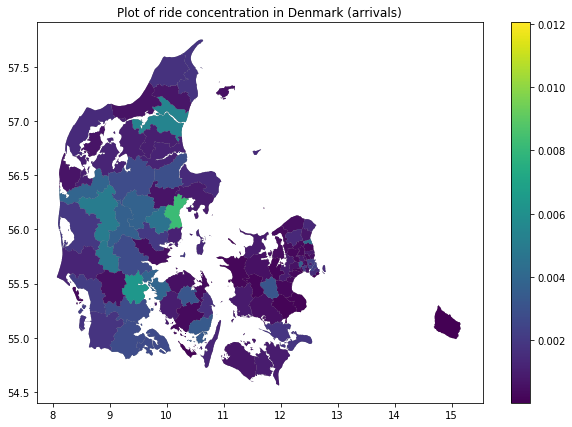

In [46]:
fig, ax = plt.subplots(1, figsize=(10,7))
base = shp.plot(ax=ax, color='gray')
#gdf.plot(ax=base, marker="o", markersize=5, alpha=0.5)
arr_ride_num_PCA.plot(ax=base, column='per_capita', alpha=1, legend=True)
ax.set_title("Plot of ride concentration in Denmark (arrivals)")
leg = ax.get_legend()